### Take some line on the plane, and generate a random Dataset around that line;

In [4]:
import numpy as np

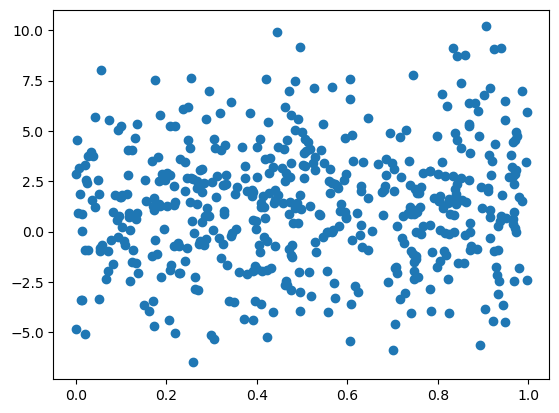

In [13]:
f = lambda x: k*x + b
n = 500
k = 0.5
b = 1
h = 3
x = np.random.rand(n)
y = (f(x) + h * np.random.normal(size=n))
dataset = np.column_stack((x, y))
dataset

### Split the Dataset into 80% - 20% portions (randomly or otherwise). Let’s call the larger part by Train Dataset, and the smaller one by Test Dataset;

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2)
train_set

array([[ 0.98598357, -1.61775292],
       [ 0.67854331,  9.01696657],
       [ 0.18737011, -1.54118497],
       ...,
       [ 0.82632453,  1.62286834],
       [ 0.78543231,  4.09341177],
       [ 0.61515942,  3.98025301]])

### Using only the $\textit{Train Dataset}$, construct the $\textit{OLS}$ Regression Line: let’s denote its equation by $y = \widehat{\beta_{0}} + \widehat{\beta_{1}}x$;

'OLS = 0.999839501239417 + 0.49966348706320907*x'

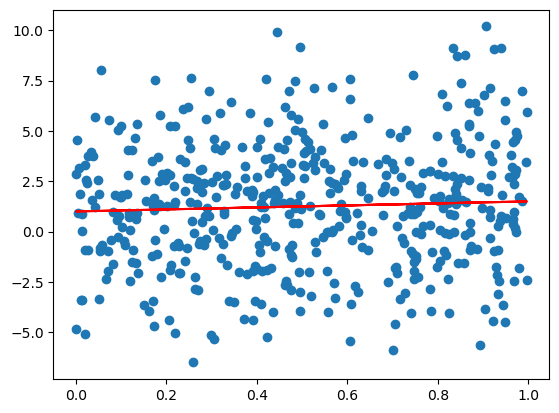

In [17]:
from sklearn.linear_model import LinearRegression
X = train_set[:,0].reshape(-1, 1)
lr = LinearRegression().fit(X, train_set[:, 1])
display(f'OLS = {lr.intercept_} + {lr.coef_[0]}*x')

### Now, for the Test Dataset, calculate the Mean Squared Error, MSE, of the Approximation:
$$MSE = \frac{1}{m}\sum_{k=1}^{m}(y_k+ \widehat{\beta_{0}} + \widehat{\beta_{1}}x_k)^2$$

In [8]:
MSE = 0
m = len(test_set[:,0])
for i in range(m):
    MSE += (test_set[i:i+1, 1][0] - lr.intercept_ - lr.coef_[0] * test_set[i:i+1, 0][0])**2
MSE = MSE/m 


### Output/print the MSE for the Test Dataset


In [12]:
MSE

8.998339612034803